In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#读取数据
data_1 = pd.read_csv('DSSPerformanceMonitor24901.csv')
#重命名列名
def gen_new_cols(col):
    return col.split('\\')[-1].replace(' ', '_')
new_cols = []
for item in data_1.columns.values.tolist():
    new_cols.append(gen_new_cols(item))
new_cols[0] = 'time'
data_1.columns = new_cols
data_1['time'] = pd.to_datetime(data_1['time'])
data_1.head()

,time,Virtual_memory_used(MB),Total_CPU,Swap_used(MB),RAM_used(MB),Size(MB),RSS(MB),%_CPU_time,KBytes_sent,KBytes_sent,...,Total_Local_Report_Cache_Size_(MB),Total_Local_Document_Cache_Size_(MB),Total_Local_Cube_Cache_Size_(MB),Memory_for_HTML_Exporting,Memory_for_Flash_Exporting,Memory_Used_by_Report_Caches_(MB),Memory_For_XML_Generation,Memory_For_PDF_Exporting,Memory_For_EXCEL_Exporting,Element_Server_Cache
0,2018-12-11 08:48:24.921,0,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-12-11 08:48:25.924,28507,21,0,28507,2136,362,11,11132300,1333166,...,0,0,0,0,0,0,0,0,0,0
2,2018-12-11 08:48:26.761,28507,21,0,28507,2136,362,11,11132300,1333166,...,0,0,3598,0,0,0,0,0,0,0
3,2018-12-11 08:48:26.866,28507,21,0,28507,2136,362,11,11132300,1333166,...,0,0,3598,0,0,0,0,0,0,0
4,2018-12-11 08:48:26.879,28507,21,0,28507,2136,362,11,11132300,1333166,...,0,0,3598,0,0,0,0,0,0,0


In [50]:
def to_int(x):
    return int(round(x.timestamp()*1000))
figure = data_1[['time', 'Total_CPU']]
figure['time'] = figure['time'].apply(to_int)
figure['time'] = figure['time'] - figure['time'].min()

/Users/superfrankie/.conda/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/superfrankie/.conda/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


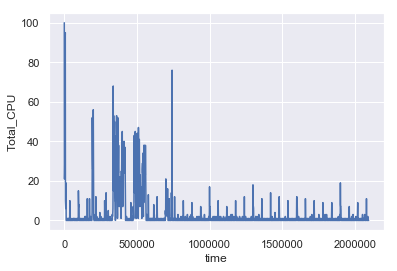

In [51]:
ax = sns.lineplot(x="time", y="Total_CPU", data=figure)